## Football Project

In [1]:
# First lets do our imports and get our dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns

enc = LabelEncoder()
onehot= OneHotEncoder()

dataset = pd.read_csv('results.csv')
dataset

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
42645,2021-09-09,Colombia,Chile,3,1,FIFA World Cup qualification,Barranquilla,Colombia,False
42646,2021-09-09,Paraguay,Venezuela,2,1,FIFA World Cup qualification,Asunción,Paraguay,False
42647,2021-09-09,Uruguay,Ecuador,1,0,FIFA World Cup qualification,Montevideo,Uruguay,False
42648,2021-09-09,Argentina,Bolivia,3,0,FIFA World Cup qualification,Buenos Aires,Argentina,False


In [3]:
#Any missing values?
empty = dataset.isna().sum()
print(empty) # none found and none seen

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64


In [4]:
# our count of tuples
len(dataset['home_team'])

42650

In [5]:
# how many tournaments?
dataset['tournament'].nunique()

#Does look right? yes we think so!
dataset['tournament'].unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'Bolivarian Games',
       'CCCF Championship', 'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Champ

In [6]:
# Convert the column date to timestamps
dataset['date'] = pd.to_datetime(dataset['date'], utc=True)
dataset.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30 00:00:00+00:00,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08 00:00:00+00:00,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07 00:00:00+00:00,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06 00:00:00+00:00,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04 00:00:00+00:00,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [7]:
#Find out how many matches were played in 2018
print(dataset['date'].value_counts()[2018])

4


C:\Users\hyppi\AppData\Local\Temp\ipykernel_20704\2986255839.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(dataset['date'].value_counts()[2018])


#### How many times the home team won, lost or had a draw - this one feels trickier - need to check if home score is > = or < for each row and make it a count?
#### I was close but not quite there,  but then we added a mask (the part just after len and before the compare) and tried a count using len and it worked!

In [8]:
#home team wins
home = len(dataset["home_score"][dataset["home_score"] > dataset["away_score"]])
print(home)

20739


In [9]:
#away team wins
away = len(dataset["home_score"][dataset["home_score"] < dataset["away_score"]])
print(away)

12074


In [10]:
#Ties
tie = len(dataset["home_score"][dataset["home_score"] == dataset["away_score"]])
print(tie)

9837


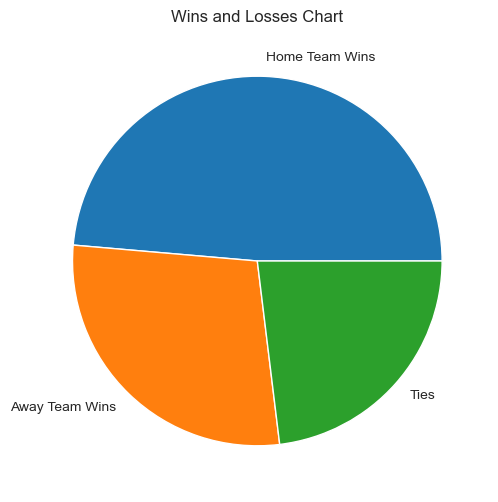

In [11]:
data = [home, away, tie] # my data for the chart
labels = ['Home Team Wins', 'Away Team Wins', 'Ties'] # Labels for each slice

sns.set_style("whitegrid") # Set style for chart
plt.figure(figsize=(6,6)) # Set figure size
plt.pie(data, labels=labels) # Create pie chart
plt.title('Wins and Losses Chart')
plt.show() # Show chart

In [12]:
#For the next Pie chart i need a count of the true's and false's in the neutral column
true = dataset['neutral'].value_counts()[True]
print(true)
false = dataset['neutral'].value_counts()[False]
print(false)

10574
32076


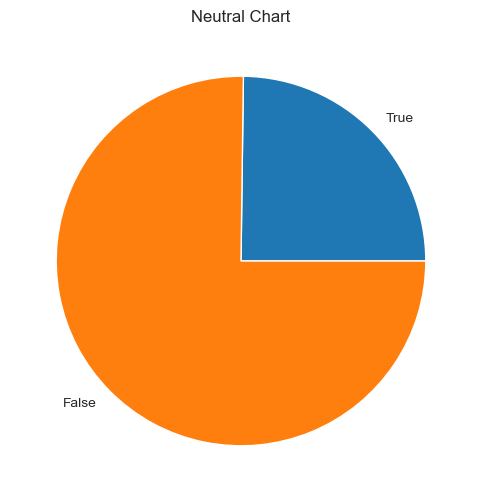

In [13]:
data = [true, false] # my data for the chart
labels = ['True', 'False'] # Labels for each slice

sns.set_style("whitegrid") # Set style for chart
plt.figure(figsize=(6,6)) # Set figure size
plt.pie(data, labels=labels) # Create pie chart
plt.title('Neutral Chart')
plt.show() # Show chart

<Axes: ylabel='Simple Pie chart'>

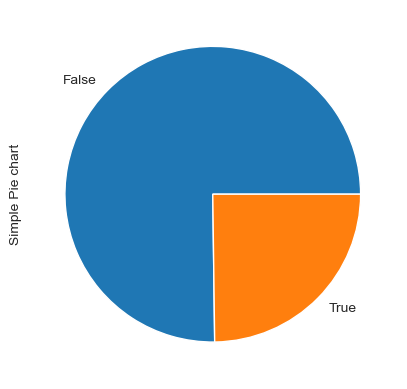

In [16]:
#Then i read the last line to try to use a single line in pandas so i'll try that way too!
dataset["neutral"].value_counts(dropna=False).plot(kind="pie", ylabel='Simple Pie chart')